In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 20

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
                "D:/data science/projects/my projects/Ramkumar_K_Planet_Diseases_Detection/PlantVillage",
                shuffle = True,
                image_size = (IMAGE_SIZE,IMAGE_SIZE),
                batch_size = BATCH_SIZE
            )

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 1 0 0 0 2 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 2 1 1 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[174. 172. 186.]
  [173. 171. 185.]
  [174. 172. 186.]
  ...
  [129. 121. 136.]
  [123. 115. 130.]
  [120. 112. 127.]]

 [[171. 169. 183.]
  [171. 169. 183.]
  [171. 169. 183.]
  ...
  [124. 116. 131.]
  [121. 113. 128.]
  [121. 113. 128.]]

 [[171. 169. 183.]
  [170. 168. 182.]
  [170. 168. 182.]
  ...
  [121. 113. 128.]
  [121. 113. 128.]
  [125. 117. 132.]]

 ...

 [[154. 148. 162.]
  [154. 148. 162.]
  [154. 148. 162.]
  ...
  [109.  99. 110.]
  [109.  99. 110.]
  [106.  96. 107.]]

 [[155. 149. 163.]
  [154. 148. 162.]
  [153. 147. 161.]
  ...
  [106.  96. 107.]
  [107.  97. 108.]
  [104.  94. 105.]]

 [[157. 151. 165.]
  [155. 149. 163.]
  [152. 146. 160.]
  ...
  [105.  95. 106.]
  [107.  97. 108.]
  [104.  94. 105.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[122. 120. 131.]
  [126. 124. 135.]
  [135. 133. 144.]
  ...
  [148. 146. 151.]
  [144. 142. 145.]
  [144. 142. 145.]]

 [[132. 130. 141.]
  [132. 130. 141.]
  [134. 132. 143.]
  ...
  [156. 154. 159.]
  [149. 147. 150.]
  [137. 135. 138.]]

 [[131. 129. 140.]
  [136. 134. 145.]
  [141. 139. 150.]
  ...
  [159. 157. 162.]
  [151. 149. 152.]
  [132. 130. 133.]]

 ...

 [[155. 157. 170.]
  [157. 159. 172.]
  [158. 160. 173.]
  ...
  [174. 177. 186.]
  [175. 178. 187.]
  [176. 179. 188.]]

 [[153. 155. 168.]
  [157. 159. 172.]
  [161. 163. 176.]
  ...
  [172. 175. 184.]
  [174. 177. 186.]
  [174. 177. 186.]]

 [[158. 160. 173.]
  [162. 164. 177.]
  [166. 168. 181.]
  ...
  [175. 178. 187.]
  [176. 179. 188.]
  [177. 180. 189.]]]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


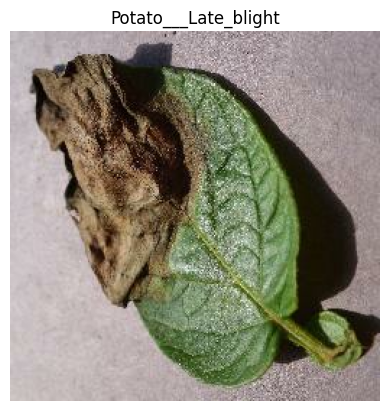

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


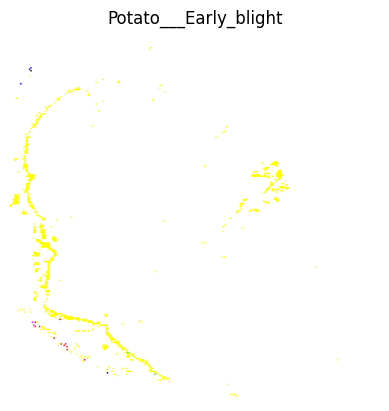

In [13]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

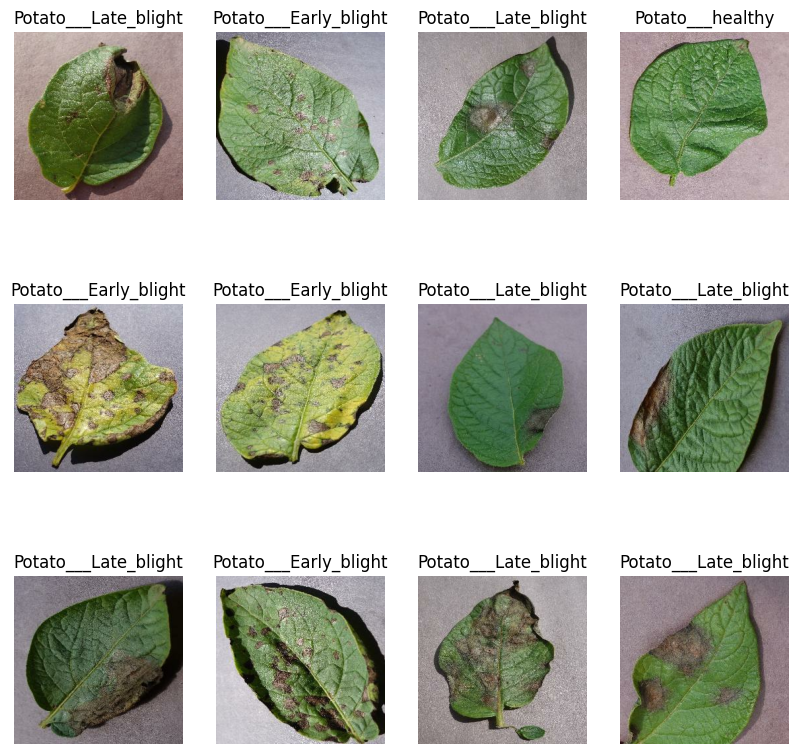

In [14]:
plt.figure(figsize =(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/225)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [20]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

d:\data science\projects\my projects\Ramkumar_K_Planet_Diseases_Detection\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [23]:
history= model.fit(
            train_ds,
            epochs = EPOCH,
            batch_size = BATCH_SIZE,
            verbose = 1,
            validation_data = val_ds   
        )

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 472ms/step - accuracy: 0.4943 - loss: 3.7905 - val_accuracy: 0.2708 - val_loss: 1.2796
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.6512 - loss: 0.8610 - val_accuracy: 0.7083 - val_loss: 0.6534
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7734 - loss: 0.5739 - val_accuracy: 0.7969 - val_loss: 0.3730
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8125 - loss: 0.4674 - val_accuracy: 0.9062 - val_loss: 0.2791
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8603 - loss: 0.3682 - val_accuracy: 0.9010 - val_loss: 0.2250
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8947 - loss: 0.2785 - val_accuracy: 0.8854 - val_loss: 0.2746
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9089 - loss: 0.2943 - val_accuracy: 0.9688 - val_loss: 0.1180
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9389 - loss: 0.1800 - val_accuracy: 0.9740 -

In [24]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9635 - loss: 0.1575


In [25]:
scores

[0.12944142520427704, 0.96875]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

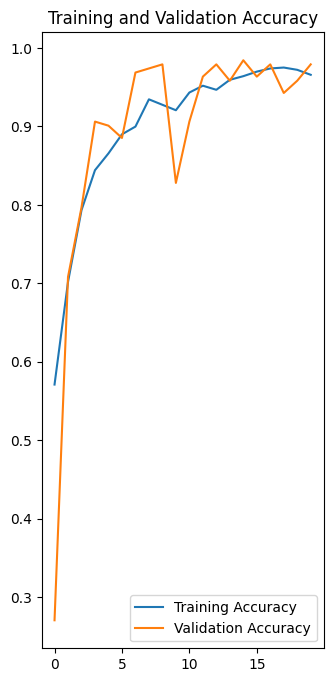

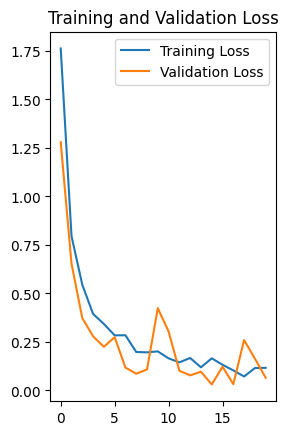

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Training and Validation Accuracy')
plt.plot(range(EPOCH),acc,label = 'Training Accuracy')
plt.plot(range(EPOCH),val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.subplot(1,2,2)
plt.title('Training and Validation Loss')
plt.plot(range(EPOCH),loss,label = 'Training Loss')
plt.plot(range(EPOCH),val_loss, label= 'Validation Loss')
plt.legend(loc='upper right')
plt.show()

First image to predict
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted label: Potato___Late_blight


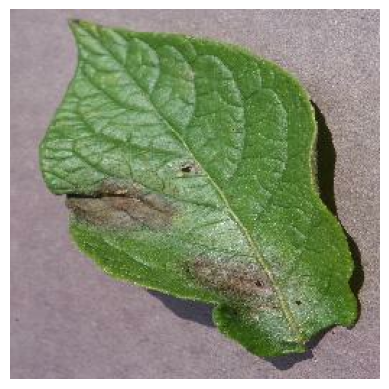

In [28]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('First image to predict')
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


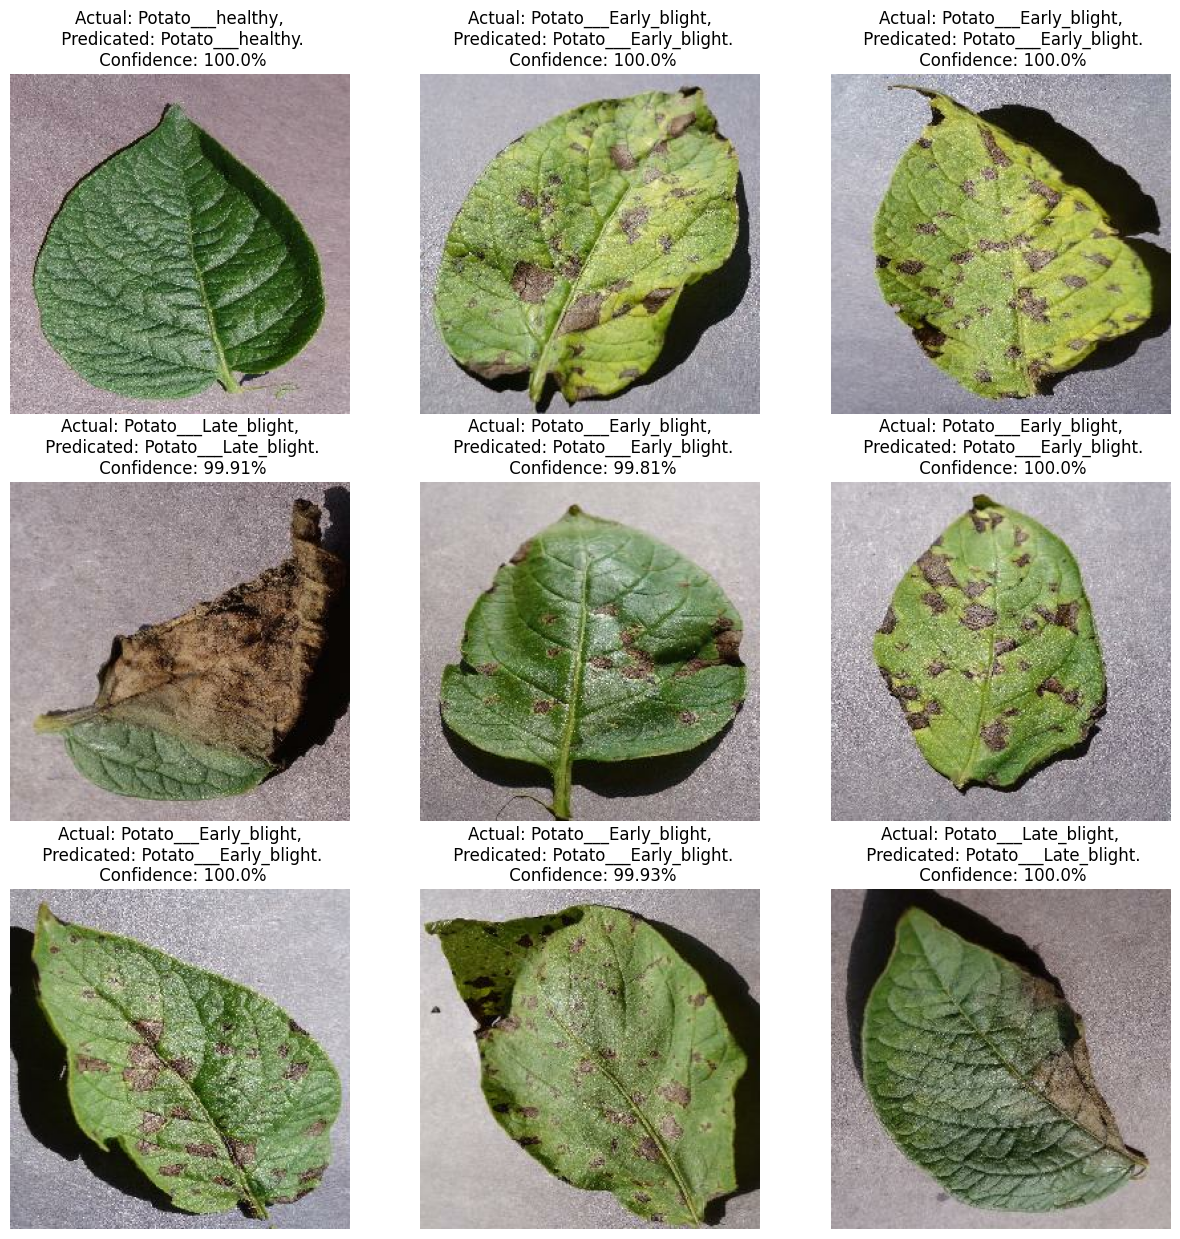

In [30]:
plt.figure(figsize=(15,15))
for image,label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8')) 
        
        predicted_class,confidence = predict(model, image[i])
        actual_class = class_names[label[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicated: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
model_version = 2
model.export(f'D:/Data science/projects/my projects/project 14/model/{model_version}')